## **Model DenseNet 201 (Pre-trained model)**

In [ ]:
from tensorflow.keras.applications.densenet import DenseNet201
from tensorflow.keras import Model

DN201 = DenseNet201(include_top = False, 
                    weights = 'imagenet', 
                    input_shape = (64,64,3))

74850304/74836368 [==============================] - 4s 0us/step


In [ ]:
DN201.summary()

Model: "densenet201"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 64, 64, 3)]  0           []                               
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 70, 70, 3)   0           ['input_1[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 32, 32, 64)   9408        ['zero_padding2d[0][0]']         
                                                                                                  
 conv1/bn (BatchNormalization)  (None, 32, 32, 64)   256         ['conv1/conv[0][0]']             
                                                                                        

In [ ]:
# Retrieve a layer based on either its name (unique) or index
transfer_layer201 = DN201.get_layer('relu')
# Freeze the DenseNet layers
# Set DN201.trainable to False moves all the layer's weights from trainable to non-trainable
DN201.trainable = False

In [ ]:
# Add classification layers afterward   
x = Flatten()(transfer_layer201.output)
x = BatchNormalization()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
x = BatchNormalization()(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.5)(x)
x = BatchNormalization()(x)
pred = Dense(2, activation='softmax')(x)
model201 = Model(DN201.input, pred)

# We've tried 0.1, 0.2 and 0.3 for dropout, similar
# We've tried 256, 128, 64

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.413725 to fit



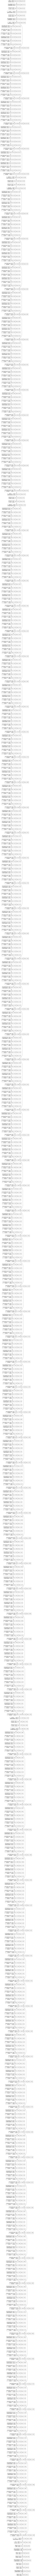

In [ ]:
plot_model(model201, 
           show_shapes = True, 
           show_layer_names = True)

In [ ]:
# Compile the model 
sgd = optimizers.SGD(learning_rate= 1e-3)
model201.compile(optimizer = 'sgd', 
                loss = 'binary_crossentropy', 
                metrics = (['accuracy']))

In [ ]:
# Fit and run the model for 10 epochs
hist       = model201.fit(
            train_images, 
            train_labels,
            epochs = 10,
            callbacks = callbacks,
            batch_size = 16,
            validation_split = 0.1,
            verbose=1)

# Change batch_size 16, 32 and 64.  but very tiny improvement

Epoch 1/10
1404/1404 [==============================] - 65s 37ms/step - loss: 0.2892 - accuracy: 0.8931 - val_loss: 0.1235 - val_accuracy: 0.9591
Epoch 2/10
1404/1404 [==============================] - 45s 32ms/step - loss: 0.2121 - accuracy: 0.9218 - val_loss: 0.1035 - val_accuracy: 0.9631
Epoch 3/10
1404/1404 [==============================] - 44s 31ms/step - loss: 0.1995 - accuracy: 0.9249 - val_loss: 0.1102 - val_accuracy: 0.9603
Epoch 4/10
1404/1404 [==============================] - 44s 31ms/step - loss: 0.1916 - accuracy: 0.9268 - val_loss: 0.0972 - val_accuracy: 0.9651
Epoch 5/10
1404/1404 [==============================] - 44s 31ms/step - loss: 0.1810 - accuracy: 0.9320 - val_loss: 0.0960 - val_accuracy: 0.9671
Epoch 6/10
1404/1404 [==============================] - 43s 31ms/step - loss: 0.1751 - accuracy: 0.9342 - val_loss: 0.0925 - val_accuracy: 0.9716
Epoch 7/10
1404/1404 [==============================] - 44s 31ms/step - loss: 0.1725 - accuracy: 0.9337 - val_loss: 0.0921 -

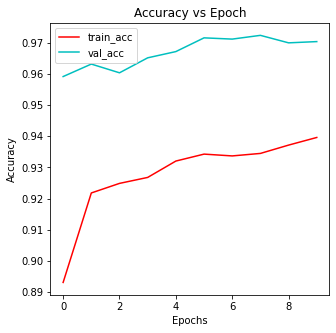

In [ ]:
# Plot the accuracies
L = len(hist.history["accuracy"])
plt.figure(figsize=(5,5))
plt.plot(np.arange(0, L), 
  hist.history["accuracy"], 
  label="train_acc",
  color='r')
plt.plot(np.arange(0, L), 
  hist.history["val_accuracy"], 
  label="val_acc",
  color='c')
plt.title("Accuracy vs Epoch")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(loc="best");

In [ ]:
accuracy = model201.evaluate(test_images, 
                            test_labels, 
                            verbose = 1)

print('\n', 'Test_Accuracy:-', accuracy[1])

82/82 [==============================] - 6s 31ms/step - loss: 0.1297 - accuracy: 0.9488

 Test_Accuracy:- 0.948846161365509


              precision    recall  f1-score   support

           0       0.94      0.95      0.95      1300
           1       0.95      0.94      0.95      1300

    accuracy                           0.95      2600
   macro avg       0.95      0.95      0.95      2600
weighted avg       0.95      0.95      0.95      2600



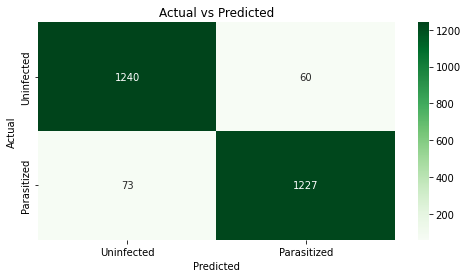

In [ ]:
pred = model201.predict(test_images)
pred = np.argmax(pred, axis = 1) 
y_tru = np.argmax(test_labels, axis = 1)

# Print the classification report
# Plot the heatmap using confusion matrix
print(classification_report(y_tru, pred))
cmat = confusion_matrix(y_tru, pred)
plt.figure(figsize=(8,4))
sns.heatmap(cmat, 
            annot = True, 
            fmt='.0f', 
            cmap="Greens",
            xticklabels=['Uninfected', 'Parasitized'], 
            yticklabels=['Uninfected', 'Parasitized'])
plt.title('Actual vs Predicted')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()